# **1. Import thư viện**

In [22]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing, datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor


print(os.listdir("../Phân tích giá nhà"))

['heat.png', 'hinh1.png', 'housing.csv', 'scatter.png', 'test.ipynb', 'thư viện.png', 'venv']


# **2. Chọn những cột cần thiết để xử lý**

| **Tên cột** | **Ý nghĩa** |
|:------------:|:-----------:|
| **CRIM**     | Tỷ lệ tội phạm trên đầu người theo từng thị trấn. |
| **ZN**       | Tỷ lệ đất dân cư được quy hoạch cho các lô đất trên 25.000 ft². |
| **INDUS**    | Tỷ lệ phần trăm diện tích đất dành cho hoạt động kinh doanh phi bán lẻ. |
| **CHAS**     | Biến giả (1 nếu thị trấn giáp sông Charles; 0 nếu không). |
| **NOX**      | Nồng độ oxit nitric (đơn vị phần trên 10 triệu). |
| **RM**       | Số phòng trung bình trên mỗi căn nhà. |
| **AGE**      | Tỷ lệ % nhà ở được xây trước năm 1940. |
| **DIS**      | Khoảng cách có trọng số đến 5 trung tâm việc làm ở Boston. |
| **RAD**      | Chỉ số tiếp cận các tuyến đường cao tốc hướng tâm (radial highways). |
| **TAX**      | Mức thuế bất động sản (toàn phần) trên mỗi \$10.000. |
| **PTRATIO**  | Tỷ lệ học sinh trên giáo viên theo từng thị trấn. |
| **B**        | 1000(Bk - 0.63)², trong đó Bk là tỷ lệ người da đen theo thị trấn. |
| **LSTAT**    | Tỷ lệ % dân số thuộc tầng lớp kinh tế thấp. |
| **MEDV**     | Giá trị trung vị của nhà (đơn vị \$1.000). |

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data = pd.read_csv('../Phân tích giá nhà/housing.csv', header=None, delimiter=r"\s+", names=column_names)

print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [5]:
# (hàng, cột)
print(np.shape(data))

(506, 14)


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **3. Tiền xử lý dữ liệu**

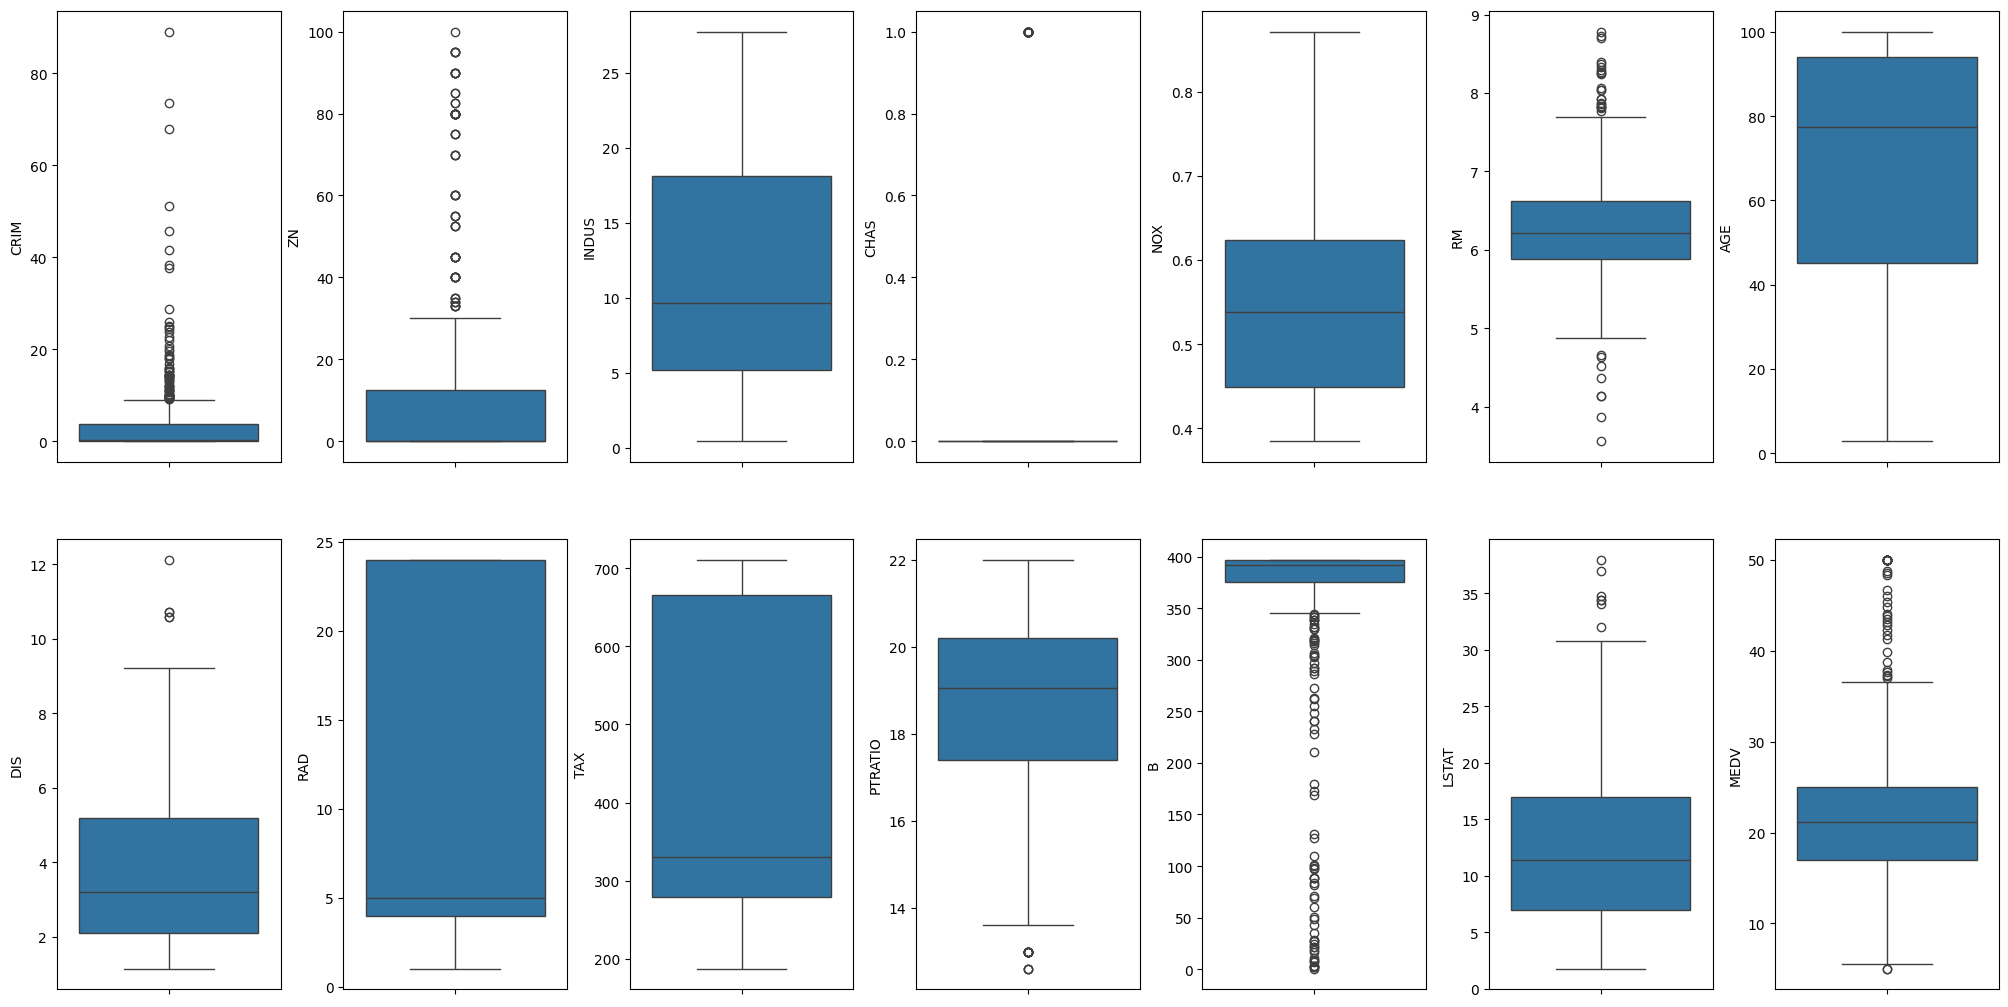

In [7]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [8]:
for k, v in data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [9]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


C:\Users\inhta\AppData\Local\Temp\ipykernel_6940\3988040691.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\inhta\AppData\Local\Temp\ipykernel_6940\3988040691.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
C:\Users\inhta\AppData\Local\Temp\ip

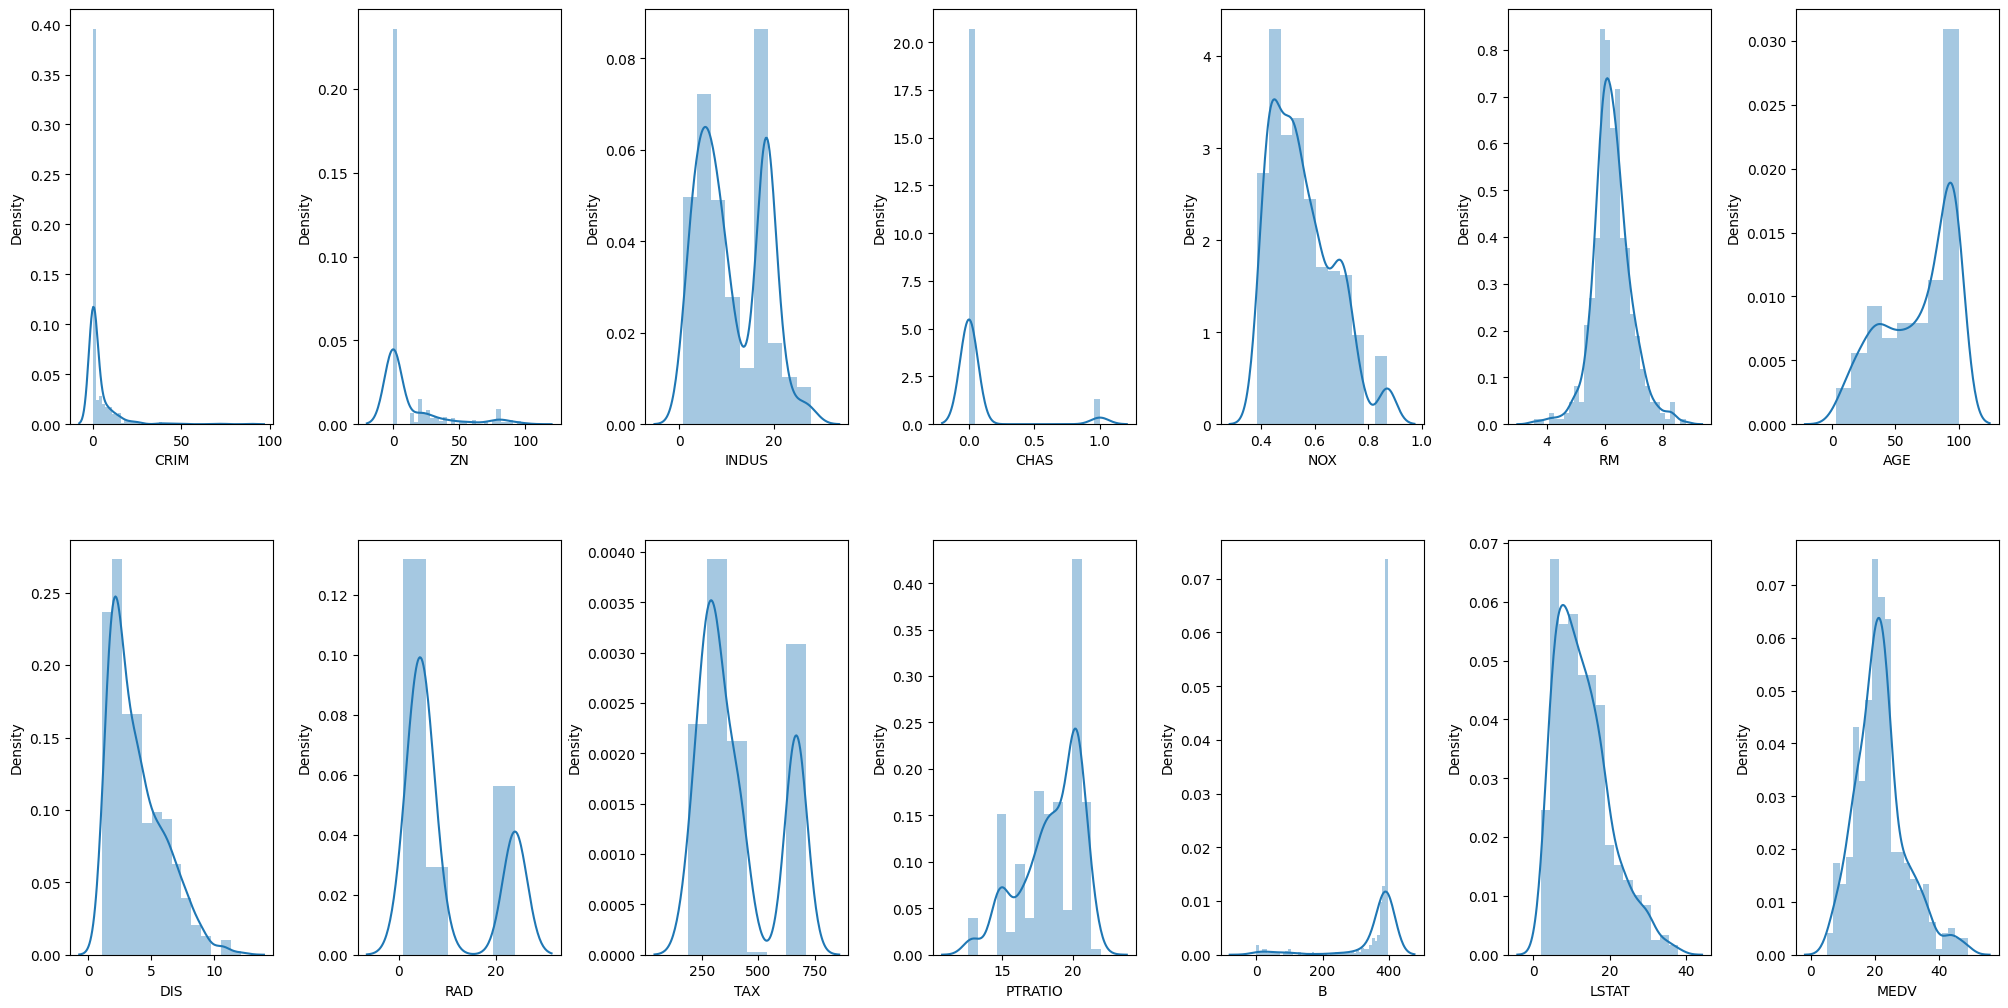

In [10]:
# check sau khi xóa 
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

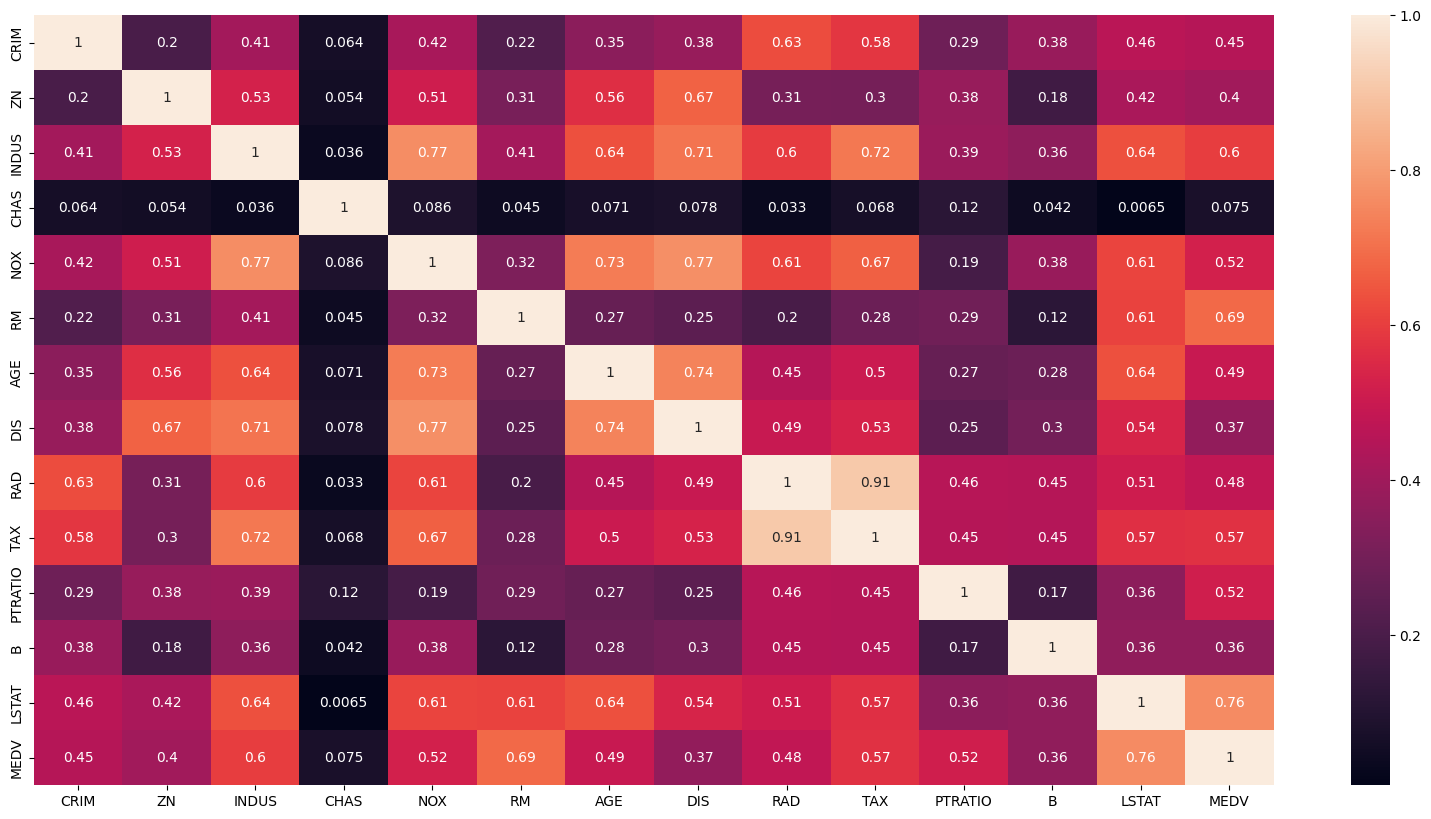

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

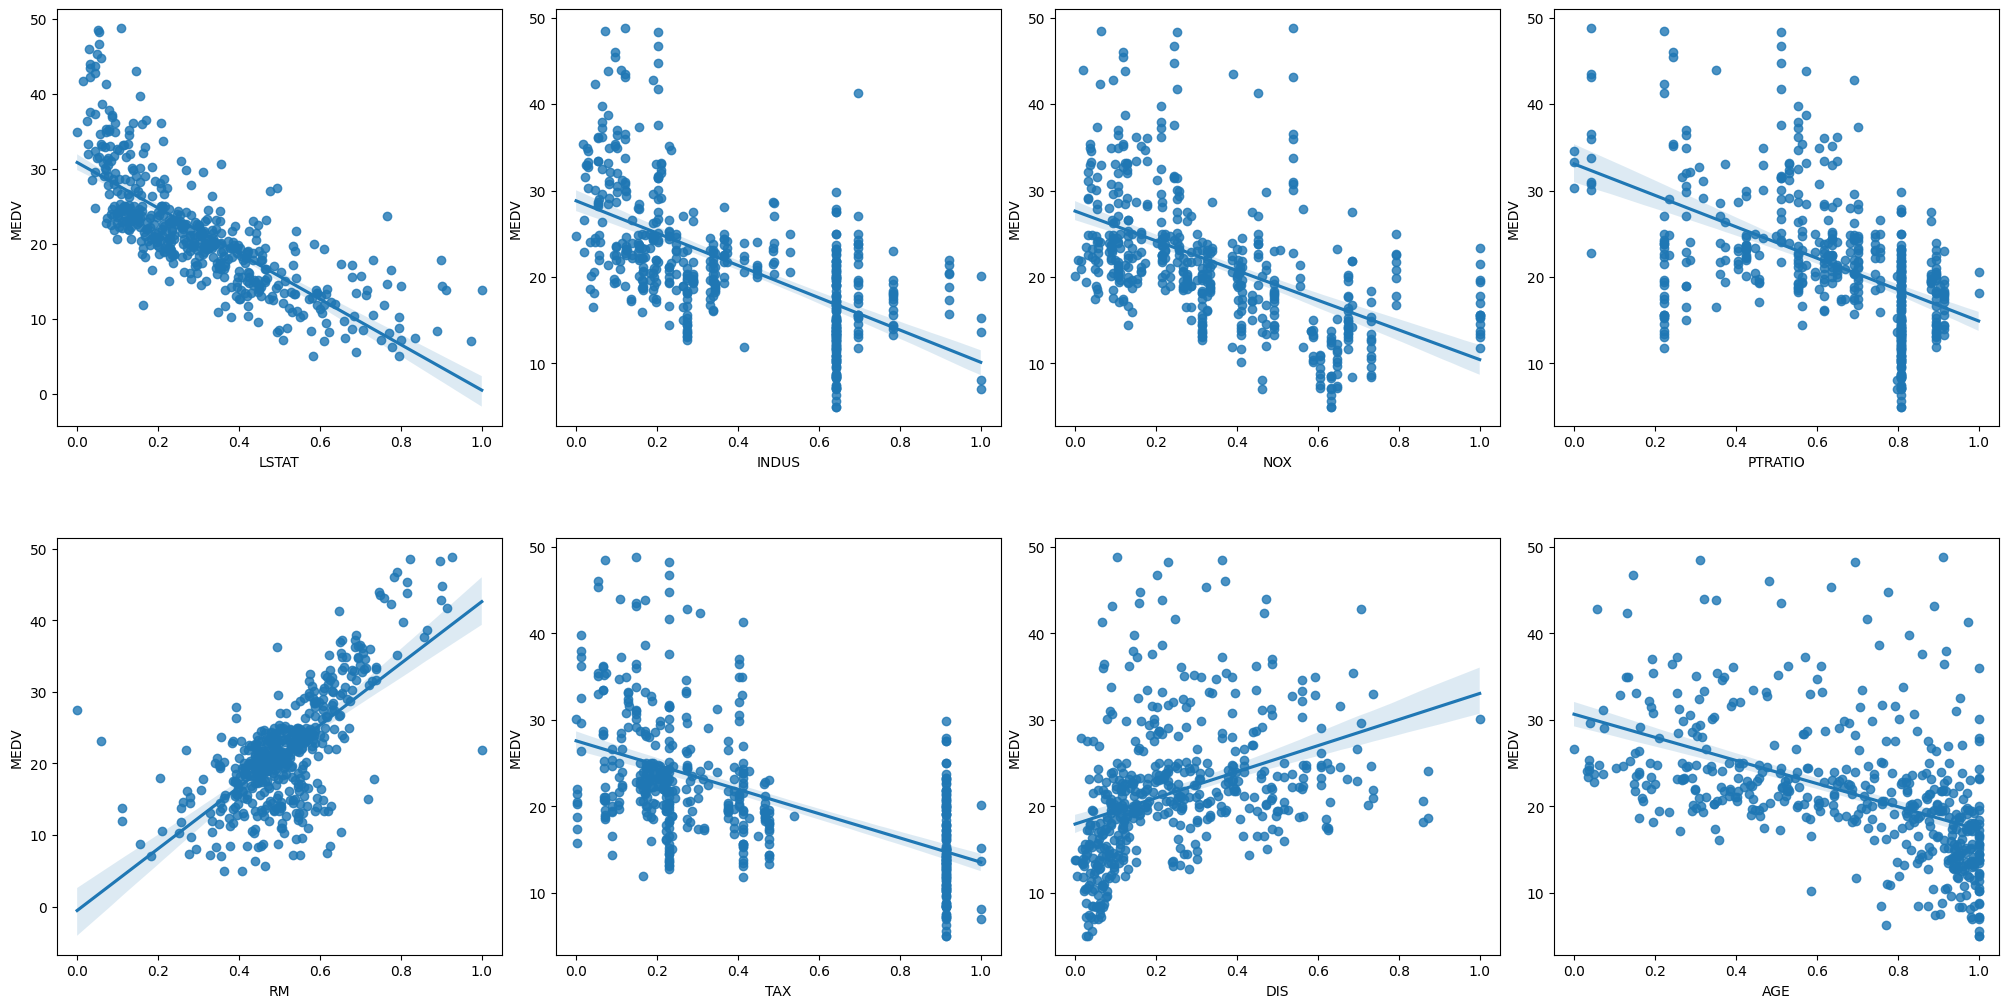

In [12]:
# scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [13]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

# **4. Xây dựng và đánh giá mô hình**

In [14]:
l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.04)
MSE: -0.04 (+/- 0.04)
MSE: -0.03 (+/- 0.03)


In [15]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.03)


In [16]:
desc_tr = DecisionTreeRegressor(max_depth=5)
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.05 (+/- 0.04)


In [17]:
knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.04 (+/- 0.02)


In [18]:
gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.02)


<Axes: >

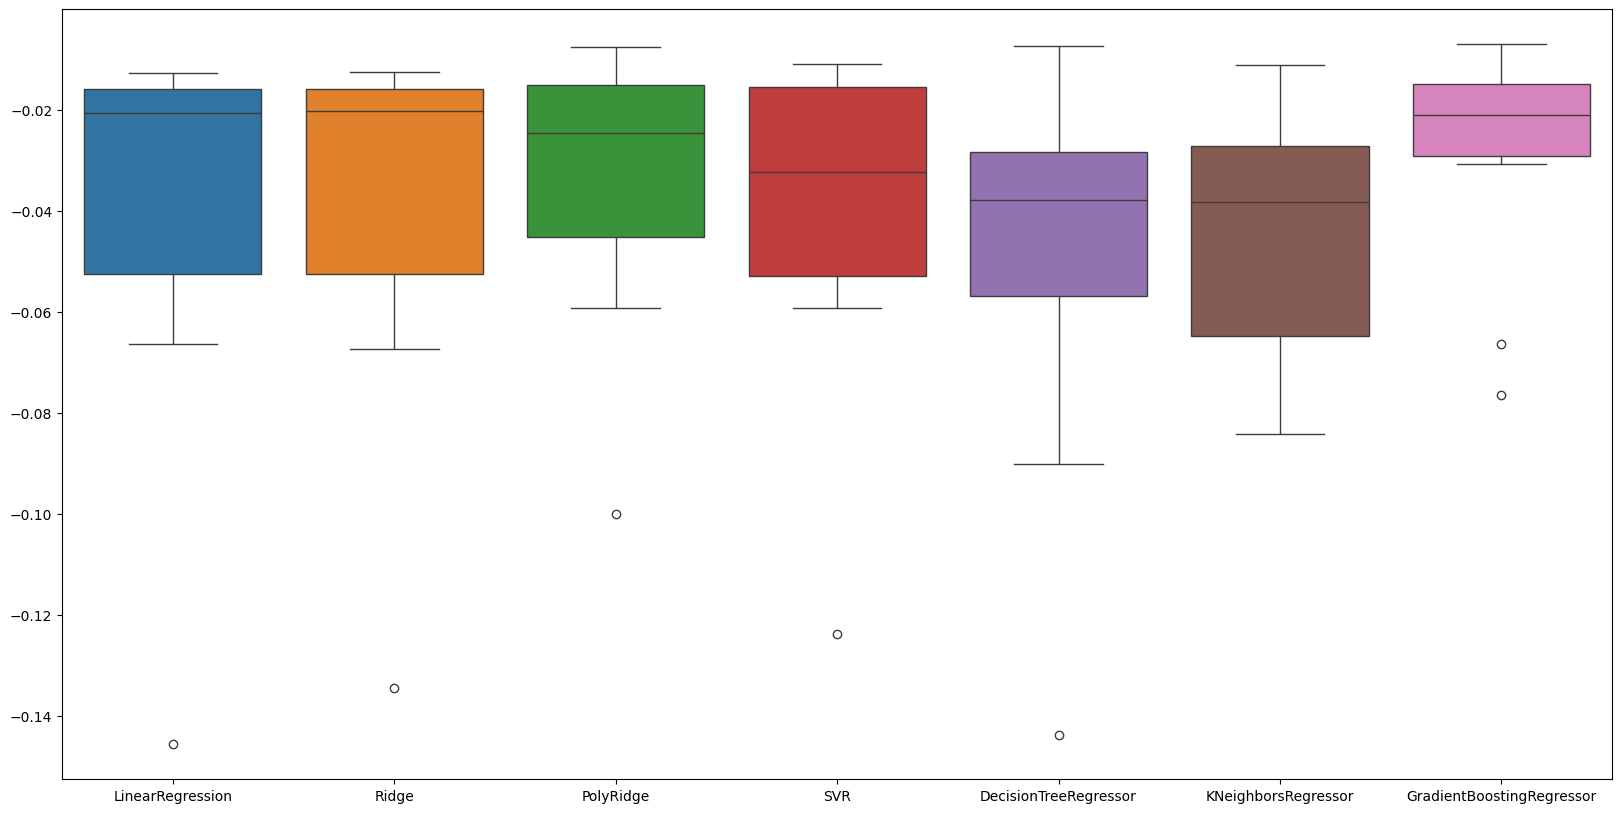

In [19]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

In [20]:
models = {
    "LinearRegression": linear_model.LinearRegression(),
    "Ridge": linear_model.Ridge(),
    "Ridge_poly": make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge()),
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}

In [21]:
for name, model in models.items():
    # 1) Tính R^2
    scores_r2 = cross_val_score(model, x_scaled, y, cv=kf, scoring='r2')
    r2_mean = scores_r2.mean()
    r2_std = scores_r2.std()

    # 2) Tính MSE
    scores_mse = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
    # Chuyển sang MSE dương
    mse_values = -scores_mse
    mse_mean = mse_values.mean()
    mse_std = mse_values.std()

    # 3) Tính MAE
    scores_mae = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_absolute_error')
    mae_values = -scores_mae
    mae_mean = mae_values.mean()
    mae_std = mae_values.std()

    print(f"Model: {name}")
    print(f"  R^2   = {r2_mean:.3f} (+/- {r2_std:.3f})")
    print(f"  MSE   = {mse_mean:.5f} (+/- {mse_std:.5f})")
    print(f"  MAE   = {mae_mean:.5f} (+/- {mae_std:.5f})")
    print("-"*50)

Model: LinearRegression
  R^2   = 0.446 (+/- 0.267)
  MSE   = 0.04034 (+/- 0.03949)
  MAE   = 0.14783 (+/- 0.06734)
--------------------------------------------------
Model: Ridge
  R^2   = 0.459 (+/- 0.264)
  MSE   = 0.03901 (+/- 0.03681)
  MAE   = 0.14660 (+/- 0.06390)
--------------------------------------------------
Model: Ridge_poly
  R^2   = 0.501 (+/- 0.242)
  MSE   = 0.03422 (+/- 0.02714)
  MAE   = 0.13720 (+/- 0.05359)
--------------------------------------------------
Model: SVR
  R^2   = 0.556 (+/- 0.211)
  MSE   = 0.03052 (+/- 0.02154)
  MAE   = 0.12942 (+/- 0.04800)
--------------------------------------------------
Model: DecisionTreeRegressor
  R^2   = 0.032 (+/- 0.553)
  MSE   = 0.05866 (+/- 0.03951)
  MAE   = 0.18289 (+/- 0.07381)
--------------------------------------------------
Model: KNeighborsRegressor
  R^2   = 0.291 (+/- 0.297)
  MSE   = 0.04568 (+/- 0.02485)
  MAE   = 0.16439 (+/- 0.04729)
--------------------------------------------------
Model: GradientBoost

- **\(R^2\):** Cho biết mô hình giải thích được bao nhiêu phần trăm biến thiên của dữ liệu. Giá trị càng cao càng tốt.
- **MSE:** Đo lường trung bình sai số bình phương; giá trị càng nhỏ thì mô hình dự đoán càng tốt, nhưng nhạy cảm với sai số lớn.
- **MAE:** Đo lường trung bình sai số tuyệt đối; cũng càng nhỏ càng tốt và ít nhạy cảm với outliers.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Huấn luyện mô hình
model = LinearRegression()
model.fit(x_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(x_test)

# Tính toán các chỉ số đánh giá
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.5f}")
print(f"R^2: {r2:.3f}")

MSE: 0.02760
R^2: 0.768


In [25]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.5f}")
print(f"R^2: {r2:.3f}")

MSE: 0.02114
R^2: 0.822


In [26]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.5f}")
print(f"R^2: {r2:.3f}")

MSE: 0.02435
R^2: 0.795


# **5. Nhận xét** 

- **Tiền xử lý dữ liệu:**  
  Việc loại bỏ các hàng có giá trị `MEDV` ≥ 50 và áp dụng biến đổi log cho các biến có skewness (độ lệch) cao giúp dữ liệu trở nên “bình thường” hơn, giảm ảnh hưởng của outliers mà vẫn giữ được thông tin cần thiết.

- **So sánh mô hình:**  
  - **SVR** cho thấy hiệu năng tốt nhất với chỉ số \(R^2\) cao nhất và sai số (MSE, MAE) thấp nhất cả qua cross-validation lẫn trên tập test.  
  - **Ridge với PolynomialFeatures (Ridge_poly)** cũng cải thiện hiệu năng so với mô hình tuyến tính cơ bản, cho thấy mối quan hệ phi tuyến giữa các biến có ý nghĩa.
  - Các mô hình như **DecisionTreeRegressor** cho kết quả không ổn định, còn **KNeighborsRegressor** đạt kết quả trung bình.

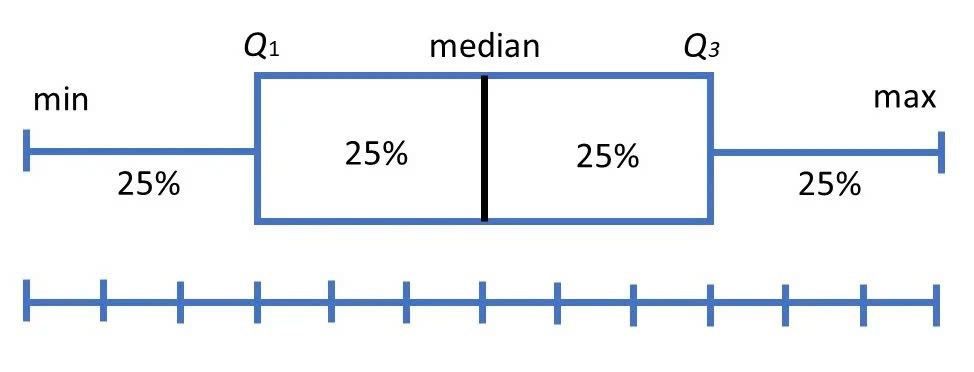


- **Xóa outliers** khi chúng rõ ràng là do lỗi, không phản ánh thực tế, hoặc khi chúng làm giảm đáng kể hiệu năng mô hình mà không có giá trị thông tin.
- **Giữ lại outliers** khi chúng phản ánh các tình huống hiếm gặp quan trọng, hoặc khi bạn có thể xử lý chúng bằng các kỹ thuật biến đổi dữ liệu hoặc mô hình robust.
